# 50_Startups in USA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\tala\\resume\\Data-Science-2-3-Multiple-Linear-Regression\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# get to know our dataset

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

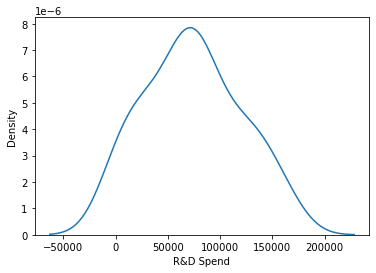

In [4]:
sns.kdeplot(data["R&D Spend"])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

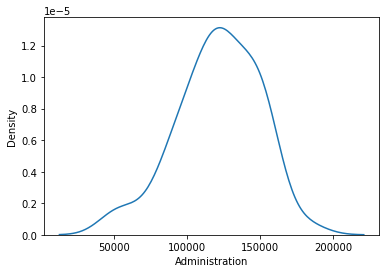

In [5]:
sns.kdeplot(data["Administration"])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

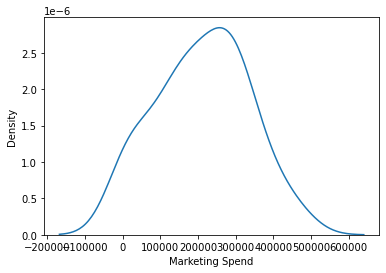

In [6]:
sns.kdeplot(data["Marketing Spend"])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

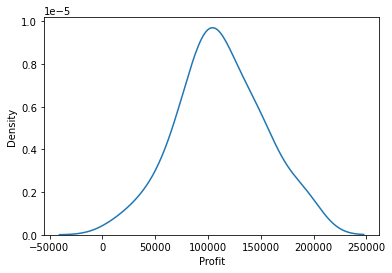

In [7]:
sns.kdeplot(data["Profit"])

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

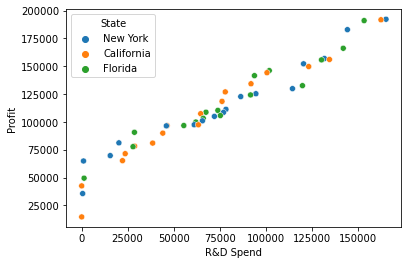

In [8]:
sns.scatterplot(data=data , x="R&D Spend",y="Profit" , hue="State")

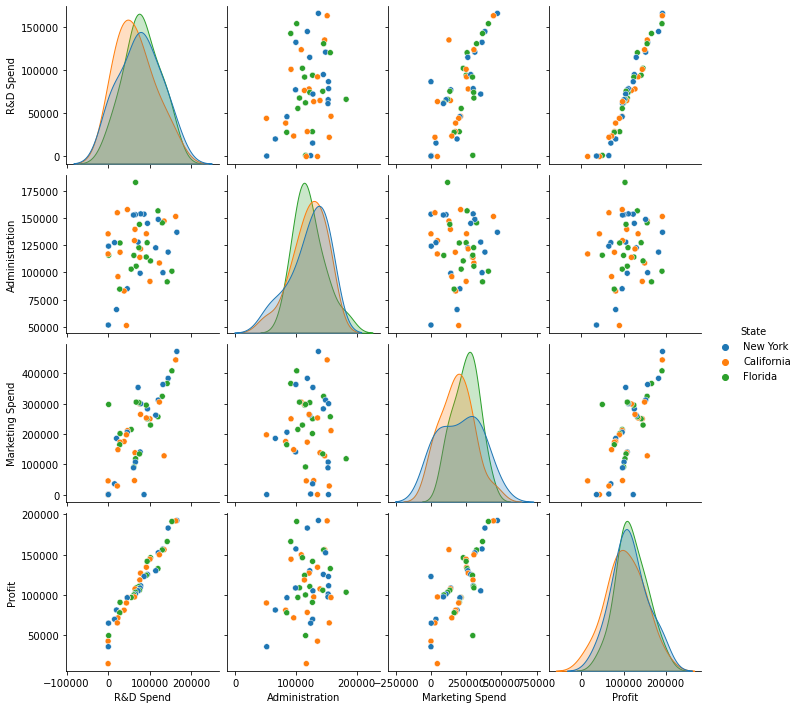

In [9]:
sns.pairplot(data[["R&D Spend" ,"Administration","Marketing Spend","State", "Profit"]] , hue="State")

<AxesSubplot:>

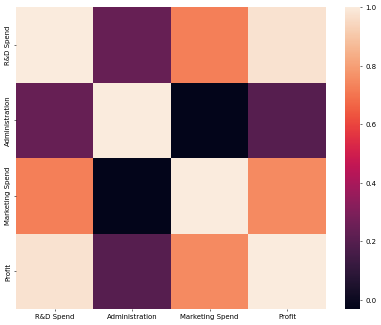

In [10]:
plt.figure(figsize=(10,8) , dpi=50)
sns.heatmap(data.corr())

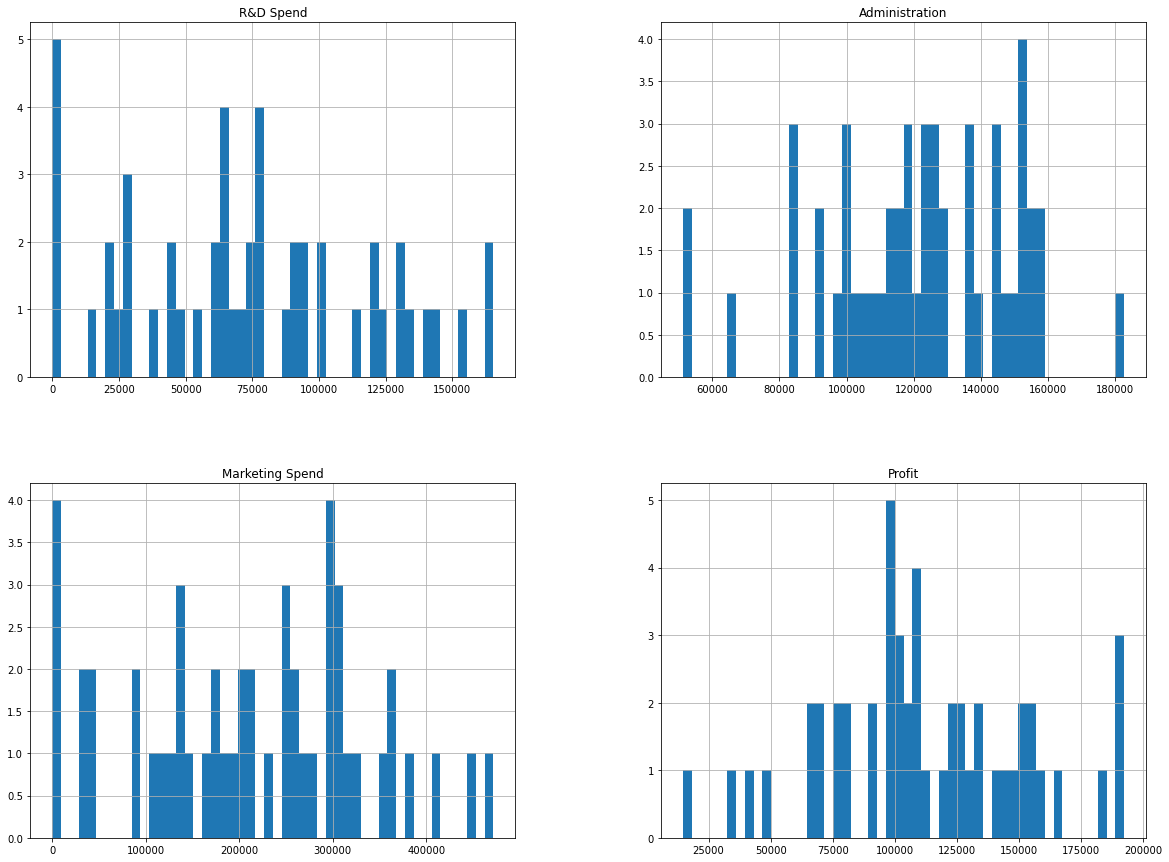

In [11]:
data.hist(bins=50 , figsize=(20,15));

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

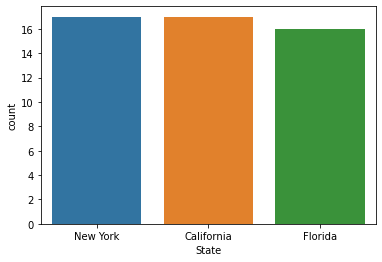

In [12]:
sns.countplot(data["State"])

In [13]:
#define inputs and target
inputs=data.iloc[:,:-1].values
target=data.iloc[:,-1].values

In [14]:
#changing category to number
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[("encoder" ,OneHotEncoder() ,[3])] , remainder="passthrough")
inputs=ct.fit_transform(inputs)

In [15]:
inputs

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

# no multicollinearity VIF(variance inflation factor)

In [16]:
#import VIF from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
variables=data[["R&D Spend","Administration" , "Marketing Spend"]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,8.384571,R&D Spend
1,4.026406,Administration
2,7.593984,Marketing Spend


In [19]:
#splitting data to train and test
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 , random_state=42)

# modeling

In [20]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train , y_train)
reg_pred=reg.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

MAE=mean_absolute_error(y_test , reg_pred)
MSE=mean_squared_error(y_test , reg_pred)

In [22]:
MAE

6961.4778132738375

In [23]:
MSE

82010363.04496025

<AxesSubplot:ylabel='Density'>

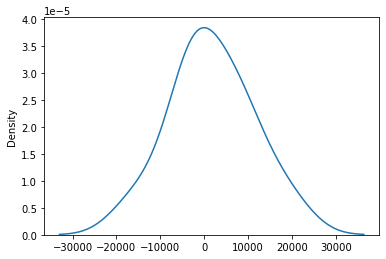

In [24]:
#residual
sns.kdeplot(y_test-reg_pred)

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test , reg_pred )

0.8987266414320496